<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective---Improve-Performance-of-Digital-Marketing-Campaigns" data-toc-modified-id="Objective---Improve-Performance-of-Digital-Marketing-Campaigns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective - Improve Performance of Digital Marketing Campaigns</a></span><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Analytics-in-Digital-Marketing" data-toc-modified-id="Analytics-in-Digital-Marketing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analytics in Digital Marketing</a></span></li><li><span><a href="#Uplift-Modeling" data-toc-modified-id="Uplift-Modeling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Uplift Modeling</a></span></li></ul></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementation</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Machine-Learning-using-CausalLift-Package" data-toc-modified-id="Machine-Learning-using-CausalLift-Package-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Machine Learning using CausalLift Package</a></span></li><li><span><a href="#Observations:" data-toc-modified-id="Observations:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Observations:</a></span></li></ul></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

## Objective - Improve Performance of Digital Marketing Campaigns

### Description

![Image - Internet Marketing](https://raw.github.com/rahul-adwani/Propensity-Uplift-Modeling/main/images/internet-marketing.png)

###### Today's world of Digital Marketing has become highly competitive

###### With the advent of automated tools, user friendly schedulers & workflow builders, Marketing Ops has evolved leaps and bounds

###### Gone are the days when customers used to receive 2 emails and 1 SMS in a week. Now, the marketers are building Contact Policies (to control the no of messages sent to a customer per day). Regulators have started to monitor and control the messages sent to customer

###### Now that the marketers have a bigger power, they have started to get bigger responsibilities - Increase Revenue and Reduce Costs

###### The biggest challenge faced by a Digital Marketer in today's world is to improve the conversion rates and to reduce the cost per click

- 

### Analytics in Digital Marketing

![Image - Analytics](https://raw.github.com/rahul-adwani/Propensity-Uplift-Modeling/main/images/analytics.jpg)

###### Today, 100% of the Digital Marketers have real-time access to customer and campaign data
###### Almost 98% of the Digital Marketers today use Campaign or Marketing Analytics (mostly decriptive) for reporting purposes. Eg, Portfolio Attribution, ROI, etc
###### Around 35-40% of the Digital Marketers also employ Predictive Analytics or Machine Learning Algorithms for use cases like A/B Testing, Sent Time Optimisation, Preferred Channel, Channel Optimization, Click through rate prediction, Heat Map, etc
###### Only 5-8% of the Digital Marketers across the globe employ Prescriptive Analytics frameworks like Uplift Model or Response Model, RFM Model, Hidden Markov Model, etc

-

### Uplift Modeling

###### In this exercise, we are going to apply a very powerful albeit very less used model called as Uplift Model or Response Model or Propensity Based Model

###### Uplift Model gives us a way to identify the customers who should be targeted and who should not be and hence giving us a way to improve our revenue and reduce costs

###### Let us try to understand the framework of Uplift Model

![Image - Uplift Model](https://raw.github.com/rahul-adwani/Propensity-Uplift-Modeling/main/images/uplift.jpg)

###### As per the model, there are four different classes of customers:
- Sure Thing: Customers who will response positively whether they were targeted or not
- Lost Cause: Customers who will never respond irrespective of whether they were targeted or not
- Persuadable: Customers who will respond positively when they were targeted
- Do Not Disturb: Customers who will not respond when they were targeted

###### This framework makes it very easy to take a decision that we should:
- Target Persuadables, since they are very likely to respond when targeted
- Do not Target Sure Things, since that would be a waste of money as these customers are going to respond anyway
- Do not Target Lost Causes, since that would again be a waste of time as these customers will never respond
- Never Target Do Not Disturb, since there is a risk to lose these customers if targeted

###### In order to implement this we are going to use CausalLift Package ([Documentation](https://pypi.org/project/causallift/)) and follow the below steps:
- Get a dataset which has observational data for both test as well as control populations
- Make sure that the dataset has these two flags - Treatment (Whether the Customer is in Test Group: 1 or Control Group: 0) and Outcome (Whether the Customer Converted: 1 or Not: 0)
- Next we calculate the Propensity/Probability of having a positive outcome in the entire test set
- Using this propensity, we calculate weights to be assigned to each sample by using Inverse Probability Weightage method
- Using these sample weights, we shall estimate Conditional Average Treatment Effects or CATE
- Using CATE, we shall be able to comment if the customer will respond positively or negatively to the treatment

## Implementation

### Importing Libraries

In [1]:
import pandas as pd
import random
import pickle
import causallift
from causallift import CausalLift
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
df = pd.read_csv('../data/data.csv') # Change the path as per the local configs
df.head()

,campaignID,custID,city,age,relationship,commtype,click,camptype,group
0,1,1,Mumbai,32,6,1,1,onboarding,1
1,2,2,Delhi,47,168,0,0,easy to bank,1
2,3,3,Noida,30,34,0,0,mandatory,1
3,4,4,Gurgaon,57,152,1,0,ntb,0
4,5,5,Bengaluru,40,177,1,0,take two,0


### Data Preprocessing

In [3]:
# randomly adding records of Treatment feature in the dataframe.
# In real world cases, this must be the output of either an A/B test or from the campaign observations

lstGroup = []
for i in range(len(df)):
    lstGroup.append(random.choice(['Control', 'Test']))
df['group'] = pd.Series(lstGroup)

In [4]:
df.head()

,campaignID,custID,city,age,relationship,commtype,click,camptype,group
0,1,1,Mumbai,32,6,1,1,onboarding,Test
1,2,2,Delhi,47,168,0,0,easy to bank,Control
2,3,3,Noida,30,34,0,0,mandatory,Control
3,4,4,Gurgaon,57,152,1,0,ntb,Control
4,5,5,Bengaluru,40,177,1,0,take two,Test


In [5]:
df['group'] = df['group'].map({'Test':1.0,'Group':0.0})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   campaignID    1000 non-null   int64  
 1   custID        1000 non-null   int64  
 2   city          1000 non-null   object 
 3   age           1000 non-null   int64  
 4   relationship  1000 non-null   int64  
 5   commtype      1000 non-null   int64  
 6   click         1000 non-null   int64  
 7   camptype      1000 non-null   object 
 8   group         497 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [7]:
df_with_dummies = pd.get_dummies(df,columns=df.select_dtypes(include=['object']).columns, drop_first=True)

In [8]:
# We need to rename a few columns since the package CausalLift works on these names
df_with_dummies.rename(columns={'group':'Treatment', 'click':'Outcome'}, inplace=True)
df_with_dummies['Treatment'].fillna(0, inplace=True)

In [9]:
df_with_dummies

,campaignID,custID,age,relationship,commtype,Outcome,Treatment,city_Bhopal,city_Chennai,city_Delhi,...,city_Lucknow,city_Mumbai,city_Nagpur,city_Noida,city_Raipur,camptype_easy to bank,camptype_mandatory,camptype_ntb,camptype_onboarding,camptype_take two
0,1,1,32,6,1,1,1.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2,2,47,168,0,0,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,3,30,34,0,0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4,4,57,152,1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,5,40,177,1,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,96,41,67,0,0,1.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
996,997,97,51,65,0,0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,998,98,49,21,0,0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
998,999,99,58,37,1,0,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [10]:
pd.crosstab(df_with_dummies['Outcome'], df_with_dummies['Treatment'], margins = True)

Treatment,0.0,1.0,All
Outcome,,,
0,454,444,898
1,49,53,102
All,503,497,1000


In [11]:
train_df, test_df = train_test_split(df_with_dummies.drop('campaignID', axis=1), test_size=0.2, random_state=0, 
                                     stratify=df_with_dummies['Treatment'])

### Machine Learning using CausalLift Package

###### The below code creates an object of the CausalLift class and the __init__ method of this class calculates the propensity against each record in the table
###### The CausalLift package uses Logistic Regression in order to calculate this Propensity


[Estimate propensity scores for Inverse Probability Weighting.]

[2021-05-25 00:55:27,188|causallift.context.flexible_context|INFO] Run pipeline (tags: ['011_bundle_train_and_test_data'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:27,196|kedro.pipeline.node|INFO] Running node: bundle_train_and_test_data([args_raw,test_df,train_df]) -> [df_00]
[2021-05-25 00:55:27,201|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-05-25 00:55:27,201|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-05-25 00:55:27,203|causallift.context.flexible_context|INFO] Run pipeline (tags: ['121_prepare_args', '131_treatment_fractions_', '141_initialize_model'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:27,211|kedro.pipeline.node|INFO] Running node: impute_cols_features([args_raw,df_00]) -> [args_intermediate]
[2021-05-25 00:55:27,212|kedro.runner.sequential_runner|INFO] Completed 1 out of 3 tasks
[2021-05-25 00:55:27,214|kedro

,custID,age,relationship,commtype,city_Bhopal,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Indore,...,city_Lucknow,city_Mumbai,city_Nagpur,city_Noida,city_Raipur,camptype_easy to bank,camptype_mandatory,camptype_ntb,camptype_onboarding,camptype_take two
coefficient,-0.001535,0.00362,-0.000828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.101747,0.0,0.0,0.0


[2021-05-25 00:55:29,903|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-05-25 00:55:29,905|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-05-25 00:55:29,914|causallift.context.flexible_context|INFO] Run pipeline (tags: ['221_estimate_propensity'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:29,922|kedro.pipeline.node|INFO] Running node: estimate_propensity([args,df_00,propensity_model]) -> [df_01]
[2021-05-25 00:55:29,928|causallift.nodes.estimate_propensity|INFO] 
### Histogram of propensity score for train and test data:


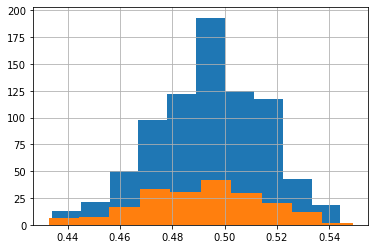

[2021-05-25 00:55:30,072|causallift.nodes.estimate_propensity|INFO] 
### Score Table for logistic regression to calculate propensity score:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,800,2,0.5525,0.565359,0.434673,0.491477,0.551914,0.4975,0.3825
test,200,2,0.4950,0.485714,0.343434,0.402367,0.493499,0.4950,0.3500


[2021-05-25 00:55:30,091|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Train:


,Pred_0,Pred_1
True_0,269,133
True_1,225,173


[2021-05-25 00:55:30,095|causallift.nodes.estimate_propensity|INFO] 
### Confusion Matrix for Test:


,Pred_0,Pred_1
True_0,65,36
True_1,65,34


[2021-05-25 00:55:30,107|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-05-25 00:55:30,108|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-05-25 00:55:30,109|causallift.causal_lift|INFO] ### Treatment fraction in train dataset: 0.4975
[2021-05-25 00:55:30,110|causallift.causal_lift|INFO] ### Treatment fraction in test dataset: 0.495


In [12]:
print('\n[Estimate propensity scores for Inverse Probability Weighting.]\n')
cl = CausalLift(train_df, test_df, enable_ipw=True, verbose=3)

###### The below code calls the CATE estimation method of the CausalLift class which uses two models - one for the customers in the test group and the other for the customers in the control group
###### The CausalLift package uses XGBoost algorithms in the Two Models method to calculate CATE
###### CATE is calculated as difference between the probabilities when a customer is treated and when a customer is not treated

In [13]:
print('\n[Create 2 models for treatment and untreatment and estimate CATE (Conditional Average Treatment Effects)]')
train_df, test_df = cl.estimate_cate_by_2_models()

print('\n[Show CATE for train dataset]')
display(train_df)
train_df.to_csv('CATE_for_Train.csv')

print('\n[Show CATE for test dataset]')
display(test_df)
test_df.to_csv('CATE_for_Test.csv')


[Create 2 models for treatment and untreatment and estimate CATE (Conditional Average Treatment Effects)]
[2021-05-25 00:55:30,119|causallift.context.flexible_context|INFO] Run pipeline (tags: ['311_fit', '312_bundle_2_models'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:30,133|kedro.pipeline.node|INFO] Running node: model_for_treated_fit([args,df_01]) -> [treated__model_dict]
[2021-05-25 00:55:30,134|causallift.nodes.model_for_each|INFO] 

## Model for Treatment = 1.0
[00:55:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[2021-05-25 00:55:31,230|causallift.nodes.model_for_each|INFO] ### Best parameters of the model trained using samples with obs

,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,398,2,0.944724,0.954545,0.5,0.65625,0.748596,0.105528,0.055276
test,99,2,0.868687,0.000000,0.0,0.00000,0.488636,0.111111,0.020202


[2021-05-25 00:55:31,285|kedro.runner.sequential_runner|INFO] Completed 1 out of 3 tasks
[2021-05-25 00:55:31,289|kedro.pipeline.node|INFO] Running node: model_for_untreated_fit([args,df_01]) -> [untreated__model_dict]
[2021-05-25 00:55:31,290|causallift.nodes.model_for_each|INFO] 

## Model for Treatment = 0.0
[00:55:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[2021-05-25 00:55:31,974|causallift.nodes.model_for_each|INFO] ### Best parameters of the model trained using samples with observational Treatment: 0.0 
 {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamm

,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,402,2,0.952736,0.944444,0.485714,0.641509,0.741495,0.087065,0.044776
test,101,2,0.871287,1.000000,0.071429,0.133333,0.535714,0.138614,0.009901


[2021-05-25 00:55:32,025|kedro.runner.sequential_runner|INFO] Completed 2 out of 3 tasks
[2021-05-25 00:55:32,039|kedro.pipeline.node|INFO] Running node: bundle_treated_and_untreated_models([treated__model_dict,untreated__model_dict]) -> [uplift_models_dict]
[2021-05-25 00:55:32,048|kedro.runner.sequential_runner|INFO] Completed 3 out of 3 tasks
[2021-05-25 00:55:32,049|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-05-25 00:55:32,068|causallift.context.flexible_context|INFO] Run pipeline (tags: ['321_predict_proba'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:32,085|kedro.pipeline.node|INFO] Running node: model_for_treated_predict_proba([args,df_01,uplift_models_dict]) -> [treated__proba]
[2021-05-25 00:55:32,096|kedro.runner.sequential_runner|INFO] Completed 1 out of 2 tasks
[2021-05-25 00:55:32,107|kedro.pipeline.node|INFO] Running node: model_for_untreated_predict_proba([args,df_01,uplift_models_dict]) -> [untreated__proba]
[2021

,custID,age,relationship,commtype,Outcome,Treatment,city_Bhopal,city_Chennai,city_Delhi,city_Gurgaon,...,city_Raipur,camptype_easy to bank,camptype_mandatory,camptype_ntb,camptype_onboarding,camptype_take two,Propensity,Proba_if_Treated,Proba_if_Untreated,CATE
index,,,,,,,,,,,,,,,,,,,,,
0,17,52,149,0,0,1.0,0,0,0,1,...,0,0,0,1,0,0,0.509685,0.031381,0.007269,0.024112
1,9,29,168,0,1,1.0,0,0,0,0,...,0,0,0,0,0,0,0.488013,0.621561,0.007903,0.613658
2,96,32,98,1,0,1.0,0,0,0,0,...,0,0,1,0,0,0,0.446592,0.152968,0.093842,0.059126
3,34,42,56,1,0,1.0,0,0,0,0,...,0,0,0,0,1,0,0.513361,0.069500,0.115949,-0.046449
4,66,51,152,1,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0.489355,0.171445,0.248380,-0.076935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,7,30,124,0,0,1.0,0,0,0,0,...,0,1,0,0,0,0,0.498791,0.032275,0.030757,0.001519
796,79,60,127,0,1,1.0,0,0,0,1,...,0,0,0,0,0,0,0.497684,0.172461,0.003859,0.168602
797,80,58,17,1,0,1.0,0,0,0,0,...,0,0,1,0,0,0,0.492825,0.052012,0.027235,0.024777



[Show CATE for test dataset]


,custID,age,relationship,commtype,Outcome,Treatment,city_Bhopal,city_Chennai,city_Delhi,city_Gurgaon,...,city_Raipur,camptype_easy to bank,camptype_mandatory,camptype_ntb,camptype_onboarding,camptype_take two,Propensity,Proba_if_Treated,Proba_if_Untreated,CATE
index,,,,,,,,,,,,,,,,,,,,,
0,86,18,20,1,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0.479153,0.119639,0.382949,-0.263310
1,100,26,3,1,0,1.0,0,0,1,0,...,0,0,0,0,0,0,0.484531,0.157820,0.020295,0.137525
2,31,39,145,1,1,0.0,0,0,0,0,...,1,0,0,0,0,1,0.493377,0.065424,0.164773,-0.099349
3,82,37,22,0,0,1.0,0,0,0,0,...,0,0,0,0,0,1,0.497455,0.009708,0.002651,0.007057
4,41,20,17,1,1,1.0,0,0,0,0,...,0,0,0,0,0,1,0.498843,0.419698,0.004103,0.415595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,40,53,73,1,0,1.0,0,0,1,0,...,0,0,0,0,1,0,0.517490,0.171650,0.025484,0.146166
196,34,47,30,1,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0.523255,0.049433,0.086259,-0.036827
197,70,35,154,1,0,1.0,0,0,0,0,...,0,1,0,0,0,0,0.472952,0.012736,0.253340,-0.240604


###### The below code calls the impact estimation method of the CausalLift class which gives the ratio between the observed conversion rates and the predicted conversion rates
###### Depending upon the value of this ratio, we can predict if the Uplift Modeling can have a incremental impact or not.

In [14]:
print('\n[Estimate the effect of recommendation based on the uplift model]')
estimated_effect_df = cl.estimate_recommendation_impact()


[Estimate the effect of recommendation based on the uplift model]
[2021-05-25 00:55:32,274|causallift.context.flexible_context|INFO] Run pipeline (tags: ['511_recommend_by_cate'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:32,286|kedro.pipeline.node|INFO] Running node: recommend_by_cate([args,df_02,treatment_fractions]) -> [df_03]
[2021-05-25 00:55:32,332|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-05-25 00:55:32,333|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-05-25 00:55:32,375|causallift.context.flexible_context|INFO] Run pipeline (tags: ['521_simulate_recommendation'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:32,421|kedro.pipeline.node|INFO] Running node: model_for_treated_simulate_recommendation([args,df_03,uplift_models_dict]) -> [treated__sim_eval_df]
[2021-05-25 00:55:32,491|causallift.nodes.model_for_each|INFO] 
### Simulated outcome for samples with recommended treatment = 1.0:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,398,2,0.927136,0.766667,0.511111,0.613333,0.745641,0.113065,0.075377
test,99,2,0.838384,0.250000,0.071429,0.111111,0.518067,0.141414,0.040404


[2021-05-25 00:55:32,516|causallift.nodes.model_for_each|INFO] 
### Simulated effect for samples with recommended treatment = 1.0:


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,398,0.105528,398,0.075377,0.714286
test,99,0.111111,99,0.040404,0.363636


[2021-05-25 00:55:32,531|kedro.runner.sequential_runner|INFO] Completed 1 out of 2 tasks
[2021-05-25 00:55:32,555|kedro.pipeline.node|INFO] Running node: model_for_untreated_simulate_recommendation([args,df_03,uplift_models_dict]) -> [untreated__sim_eval_df]
[2021-05-25 00:55:32,596|causallift.nodes.model_for_each|INFO] 
### Simulated outcome for samples with recommended treatment = 0.0:


,# samples,# classes,accuracy,precision,recall,f1,roc_auc,observed CVR,predicted CVR
train,402,2,0.950249,0.730769,0.593750,0.655172,0.787416,0.079602,0.064677
test,101,2,0.881188,0.400000,0.181818,0.250000,0.574242,0.108911,0.049505


[2021-05-25 00:55:32,622|causallift.nodes.model_for_each|INFO] 
### Simulated effect for samples with recommended treatment = 0.0:


,# samples chosen,observed CVR,# samples recommended,predicted CVR,pred/obs CVR
partition,,,,,
train,402,0.087065,402,0.064677,0.742857
test,101,0.138614,101,0.049505,0.357143


[2021-05-25 00:55:32,635|kedro.runner.sequential_runner|INFO] Completed 2 out of 2 tasks
[2021-05-25 00:55:32,637|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.
[2021-05-25 00:55:32,669|causallift.context.flexible_context|INFO] Run pipeline (tags: ['531_estimate_effect'], SequentialRunner, only_missing: False)
[2021-05-25 00:55:32,682|kedro.pipeline.node|INFO] Running node: estimate_effect([args,treated__sim_eval_df,untreated__sim_eval_df]) -> [estimated_effect_df]
[2021-05-25 00:55:32,687|causallift.nodes.utils|INFO] 
## Overall simulated effect of recommendation based on the uplift modeling:


,# samples,observed CVR,predicted CVR,pred/obs CVR
partition,,,,
train,800,0.09625,0.070,0.727273
test,200,0.12500,0.045,0.360000


[2021-05-25 00:55:32,693|kedro.runner.sequential_runner|INFO] Completed 1 out of 1 tasks
[2021-05-25 00:55:32,694|kedro.runner.sequential_runner|INFO] Pipeline execution completed successfully.


### Observations:
- We can observe here that by using Uplift Modeling the ratio of predicted conversion rate to observed conversion rate < 1
- Hence, we can say that Uplift Modeling will not have an incremental impact on this dataset
- The reason for this could be that we have generated data arbitrarily while the real world datasets can have different sets of results

###### References:
[CausalLift Documentation](https://pypi.org/project/causallift/)

[Image Sources](https://pixabay.com/)

[Uplift Modeling : Predicting Incremental Gains](http://cs229.stanford.edu/proj2018/report/296.pdf)

[Wikipedia](https://en.m.wikipedia.org/wiki/Main_Page)

[Stack Overflow](https://stackoverflow.com/)

[INSAID](http://insaid.co/)



- The images used are either royalty free stock images or hand-drawn

## Next Steps

###### Deployment of this solution on a public server and testing this with actual marketing teams
###### Evaluation of the model performance by experimenting
###### Evaluation of similar packages like pylift, scikit-uplift, CausalML, etc